In [1]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler

from pandas.plotting import scatter_matrix

%matplotlib inline       
#import

In [2]:
iris = load_iris()      #load

In [3]:
X_orig = pd.DataFrame(iris["data"], columns = iris.feature_names)  #rozbijanie

In [4]:
skaler = MinMaxScaler()         #skalowanie
X = skaler.fit_transform(X_orig)
X = pd.DataFrame(X, columns = iris.feature_names)

In [5]:
kmeans = KMeans() #wybor modelu

In [6]:
kmeans.fit(X)  #fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
y_clustered = kmeans.predict(X)    #predykcja
y_clustered

array([5, 0, 0, 0, 5, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 0, 0, 0, 5, 5, 0, 0, 5, 5, 5, 0, 0, 5, 0, 0, 0, 5, 0, 0, 5,
       5, 0, 5, 0, 5, 0, 7, 7, 7, 3, 7, 4, 7, 3, 7, 4, 3, 4, 3, 4, 4, 7,
       4, 4, 1, 3, 1, 4, 1, 4, 7, 7, 7, 7, 4, 3, 3, 3, 4, 1, 4, 7, 7, 4,
       4, 3, 4, 7, 4, 3, 4, 4, 4, 4, 3, 4, 6, 1, 2, 1, 6, 2, 4, 2, 1, 2,
       6, 1, 6, 1, 1, 6, 6, 2, 2, 1, 6, 1, 2, 1, 6, 2, 1, 1, 6, 2, 2, 2,
       6, 1, 1, 2, 6, 6, 1, 6, 6, 6, 1, 6, 6, 6, 1, 6, 6, 1], dtype=int32)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14a9b3c8>,
      dtype=object)

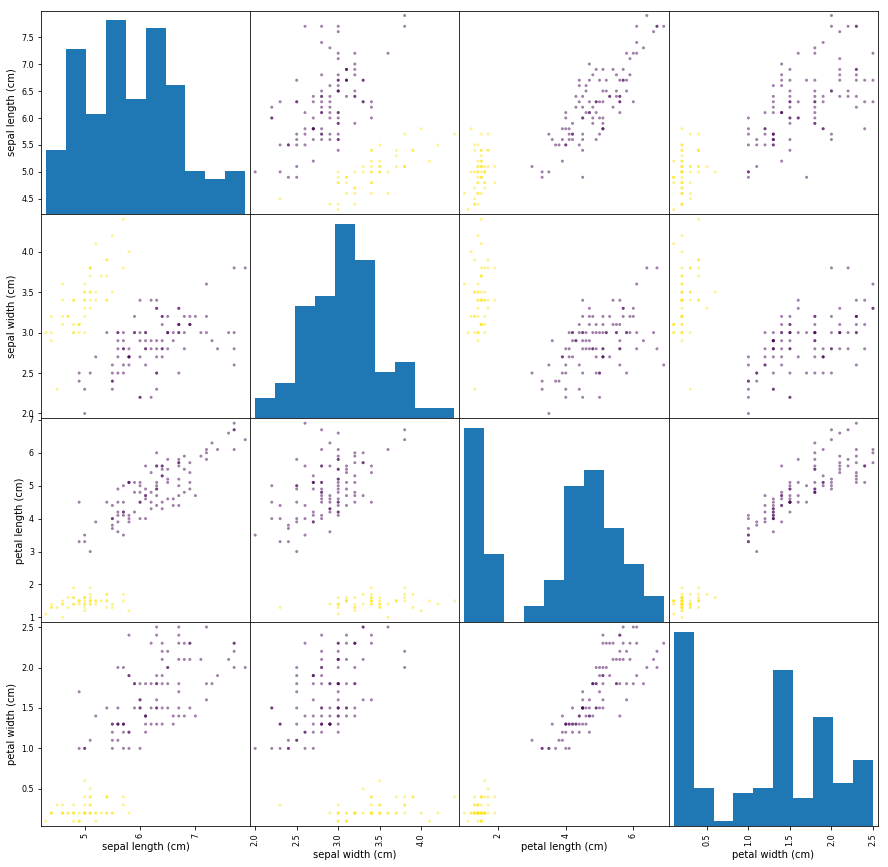

In [15]:
scatter_matrix(X_orig[["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)"]], 
               figsize=(15, 15), diagonal="hist",c = y_clustered)

In [16]:
ile_grup = range(2,31)

wyniki = []

for n_grup in ile_grup:    
    kmeans = KMeans(n_clusters=n_grup, random_state=10)
    przewidziane = kmeans.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    srednia_sylwetka = silhouette_score(X, przewidziane)
    print("Dla n_grup =", n_grup,
          "średnia sylwetka wynosi:", srednia_sylwetka)
    wyniki.append(srednia_sylwetka)

Dla n_grup = 2 średnia sylwetka wynosi: 0.6294675561844616
Dla n_grup = 3 średnia sylwetka wynosi: 0.5043188549076771
Dla n_grup = 4 średnia sylwetka wynosi: 0.4446273300565586
Dla n_grup = 5 średnia sylwetka wynosi: 0.3553831526231402
Dla n_grup = 6 średnia sylwetka wynosi: 0.3552714311863797
Dla n_grup = 7 średnia sylwetka wynosi: 0.3470451985196082
Dla n_grup = 8 średnia sylwetka wynosi: 0.33963192400145836
Dla n_grup = 9 średnia sylwetka wynosi: 0.32713743835909737
Dla n_grup = 10 średnia sylwetka wynosi: 0.3363312279641431
Dla n_grup = 11 średnia sylwetka wynosi: 0.33315411603483125
Dla n_grup = 12 średnia sylwetka wynosi: 0.32147944672078216
Dla n_grup = 13 średnia sylwetka wynosi: 0.3247867577916942
Dla n_grup = 14 średnia sylwetka wynosi: 0.32739449972621915
Dla n_grup = 15 średnia sylwetka wynosi: 0.31126978302348457
Dla n_grup = 16 średnia sylwetka wynosi: 0.3148869604141295
Dla n_grup = 17 średnia sylwetka wynosi: 0.30628056029444584
Dla n_grup = 18 średnia sylwetka wynosi: 

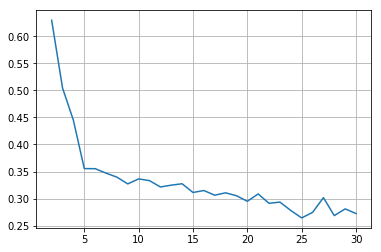

In [17]:
wyniki = pd.Series(wyniki, index=ile_grup)
wyniki.plot(grid = True)   #plot

In [18]:
k = wyniki[wyniki == wyniki.max()].index.item()

In [19]:
kmeans = KMeans(n_clusters = k)
y_clustered = kmeans.fit_predict(X)
y_clustered

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1563ec50>,
      dtype=object)

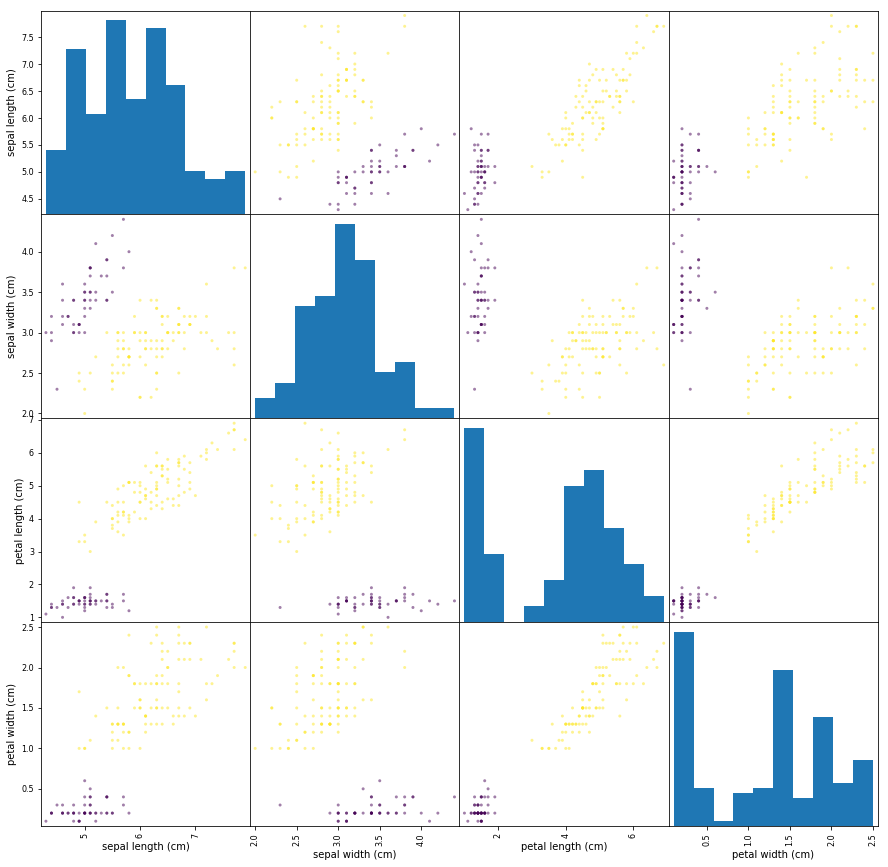

In [20]:
scatter_matrix(X_orig[["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)"]], 
               figsize=(15, 15), diagonal="hist",c = y_clustered)     #wykres

In [21]:
scatter_matrix(X_orig[["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)"]], 
               figsize=(15, 15), diagonal="hist",c = y)   #wykres

NameError: name 'y' is not defined